In [1]:
from __future__ import print_function

In [97]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns

In [103]:
'''
Classifiers
'''
# time_paths = [
#     '../tfhub/inference/mobilenet_v2_050_224/processing_time.txt',
#     '../tfhub/inference/inception_v3/processing_time.txt',
#     '../tfhub/inference/nasnet_large/processing_time.txt',
#     '../tfhub/inference/resnet_v2_152/processing_time.txt',
# ]
# plot_labels = [
#     'MobileNet',
#     'Inception-V3',
#     'NASNet',
#     'ResNet-152',
# ]

'''
DenseNet-Small
'''
time_paths = [
    '../densenet/5x/inference/processing_time.txt',
    '../densenet_small/5x/inference/processing_time.txt',
    '../fcn8s/5x/inference/processing_time.txt',
    '../fcn8s_small/5x/inference/processing_time.txt',
    '../unet/5x/inference/processing_time.txt',
    '../unet_small/5x/inference/processing_time.txt',
]
plot_labels = [
    'DenseNet',
    'DenseNet-Small',
    'FCN-8s',
    'FCN-8s-Small',
    'UNet',
    'UNet-Small'
]
time_paths = [
    '../densenet_small/5x/inference/processing_time.txt',
    '../densenet_small/5x_FOV/inference/processing_time.txt',
    '../densenet_small/10x/inference/processing_time.txt',
    '../densenet_small/10x_FOV/inference/processing_time.txt',
    '../densenet_small/20x/inference/processing_time.txt',
    '../densenet_small/20x_FOV/inference/processing_time.txt',
]
plot_labels = [
    '5X',
    '5X-FOV',
    '10X',
    '10X-FOV',
    '20X',
    '20X-FOV'
]

model_times = []
for pk,time_path in enumerate(time_paths):
    time_table = pd.read_table(time_path, header=None, index_col=None)[:-1]
    minute_times = []
    for k in range(len(time_table)):
        time_mins = time_table.iloc[k,1]
        minute_times.append(time_mins)

    minute_times = np.array(minute_times)
    model_times.append(minute_times)

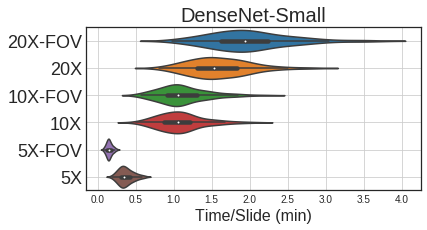

In [114]:
# plot_labels = [
#     'MobileNet',
#     'Inception-V3',
#     'NASNet',
#     'ResNet-152'
# ]
fig, ax = plt.subplots(1,1, figsize=(6,3))
# plt.boxplot(model_times, vert=False, labels=plot_labels)
_ = sns.violinplot(data=model_times[::-1], orient='h', width=0.8, scale='width')
# plt.yticks(fontsize=18)

plt.yticks(np.arange(6), plot_labels[::-1], fontsize=18)
plt.xlabel('Time/Slide (min)', fontsize=16)

# plt.yticks(np.arange(4), plot_labels, fontsize=18)
# plt.title('Tile Classifiers (10X)', fontsize=20)

plt.title('DenseNet-Small', fontsize=20)
plt.grid()

In [112]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the sa